Assignment Day Extra Class 5 - Feature Importance Analysis & Model Interpretation <br>

Chintia Hildayanti <br>
Data Science 26

###Install & Import Package

In [223]:
# Install dalex
!pip install dalex
#install scikit plot
!pip install scikit-plot

In [269]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import xgboost classifier
from xgboost import XGBClassifier
# import dalex to explain complex model
import dalex as dx
# import OrdinalEncoder for label encoding
from sklearn.preprocessing import OrdinalEncoder
# import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler
# import scipy for certain statistical function
from scipy import stats
# import confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Load Dataset

In [225]:
# load bank churn dataset

churn_df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/bank_churn_dataset/bank_churn_data.csv")

In [226]:
# display the dataset
churn_df.head(10)

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


About The Dataset

●	user_id: customer account number. <br>
●	attrition_flag: customer status (Existing and Attrited).<br>
●	customer_age: age of the customer.<br>
●	gender: gender of customer (M for male and F for female).<br>
●	dependent_count: number of dependents of customers.<br>
●	education_level: customer education level (Uneducated, High School, Graduate, College, Post-Graduate, Doctorate, and Unknown).<br>
●	marital_status: customer's marital status (Single, Married, Divorced, and Unknown).<br>
●	income_category: customer income interval category (Less than $40K, $40K-$60k, $60K-$80K, $80K-$120K, $120K +, and Unknown).<br>
●	card_category: type of card used (Blue, Silver, Gold, and Platinum).<br>
●	months_on_book: period of being a customer (in months).<br>
●	total_relationship_count: the number of products used by customers in the bank.<br>
●	months_inactive_12_mon: period of inactivity for the last 12 months.<br>
●	contacts_count_12_mon: the number of interactions between the bank and the customer in the last 12 months.<br>
●	credit_limit: credit card transaction nominal limit in one period.<br>
●	total_revolving_bal: total funds used in one period.<br>
●	avg_open_to_buy: the difference between the credit limit set for the cardholder's account and the current balance.<br>
●	total_amt_chng_q4_q1: increase in customer transaction nominal between quarter 4 and quarter 1.<br>
●	total_trans_amt: total nominal transaction in the last 12 months.<br>
●	total_trans_ct: the number of transactions in the last 12 months.<br>
●	total_ct_chng_q4_q1: the number of customer transactions increased between quarter 4 and quarter 1.<br>
●	avg_utilization_ratio: percentage of credit card usage.<br>


In [227]:
# melihat summary data
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [228]:
# check missing value
churn_df.isnull().sum()

,0
user_id,0
attrition_flag,0
customer_age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
income_category,0
card_category,0
months_on_book,0


In [229]:
# check duplicate value
churn_df.duplicated().sum()

0

In [230]:
# check total column & row
churn_df.shape

(10127, 21)

In [231]:
# drop identifier
churn_df = churn_df.drop(columns=['user_id'])

In [232]:
# display the dataset
churn_df.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


###Feature Engineering

Label Encoding

In [233]:
# merubah variabel kategorik menjadi numerik, kolom attrition flag, gender dan marital status dengan label encoding

churn_df.loc[:, 'attrition_flag'] = churn_df.loc[:, 'attrition_flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0})
churn_df.loc[:, 'gender'] = churn_df.loc[:, 'gender'].replace({'M': 0, 'F': 1})
churn_df.loc[:, 'marital_status'] = churn_df.loc[:, 'marital_status'].replace({'Single': 0, 'Married': 1, 'Divorced':2, 'Unknown':3})

Ordinal Encoding Kolom Education Level

In [234]:
# mapping label kategori
categories_education = [['Uneducated', 'High School', 'Graduate', 'College', 'Post-Graduate', 'Doctorate', 'Unknown']]

# Membuat instance OrdinalEncoder
ordinal_encoder_education = OrdinalEncoder(categories=categories_education)

# Menerapkan ordinal encoding pada kolom education_level
churn_df['education_level'] = ordinal_encoder_education.fit_transform(churn_df[['education_level']])

# Menampilkan mapping label ke nilai numerik
print("\nMapping Ordinal Encoding untuk education_level:")
for i, category in enumerate(categories_education[0]):
    print(f'{category}: {i}')


Mapping Ordinal Encoding untuk education_level:
Uneducated: 0
High School: 1
Graduate: 2
College: 3
Post-Graduate: 4
Doctorate: 5
Unknown: 6


Ordinal Encoding Kolom Income Category

In [235]:
# mapping label kategori
categories_income = [['Less than $40K','$40K - $60K', '$60K - $80K','$80K - $120K','$120K +','Unknown']]

# Membuat instance OrdinalEncoder
ordinal_encoder_income = OrdinalEncoder(categories=categories_income)

# Menerapkan ordinal encoding pada kolom income category
churn_df['income_category'] = ordinal_encoder_income.fit_transform(churn_df[['income_category']])

# Menampilkan mapping label ke nilai numerik
print("\nMapping Ordinal Encoding untuk income_category:")
for i, category in enumerate(categories_income[0]):
    print(f'{category}: {i}')


Mapping Ordinal Encoding untuk income_category:
Less than $40K: 0
$40K - $60K: 1
$60K - $80K: 2
$80K - $120K: 3
$120K +: 4
Unknown: 5


Ordinal Encoding Kolom Card Category

In [236]:
# mapping label kategori
categories_card = [['Blue', 'Silver', 'Gold', 'Platinum']]

# Membuat instance OrdinalEncoder
ordinal_encoder_card = OrdinalEncoder(categories=categories_card)

# Menerapkan ordinal encoding pada kolom card category
churn_df['card_category'] = ordinal_encoder_card.fit_transform(churn_df[['card_category']])

# Menampilkan mapping label ke nilai numerik
print("\nMapping Ordinal Encoding untuk card_category:")
for i, category in enumerate(categories_card[0]):
    print(f'{category}: {i}')


Mapping Ordinal Encoding untuk card_category:
Blue: 0
Silver: 1
Gold: 2
Platinum: 3


In [237]:
# merubah tipe data string menjadi integer
cols_to_convert = ['attrition_flag','gender','education_level', 'marital_status', 'income_category', 'card_category']

churn_df[cols_to_convert] = churn_df[cols_to_convert].astype(int, errors='ignore')

In [238]:
# check hasil encoding
churn_df

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,0,45,0,3,1,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,2,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,1,3,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,0,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,2,0,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,0,2,6,2,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,1,1,1,1,0,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,0,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [239]:
# melihat summary data setelah merubah tipe data
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  int64  
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  int64  
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  int64  
 5   marital_status            10127 non-null  int64  
 6   income_category           10127 non-null  int64  
 7   card_category             10127 non-null  int64  
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  
 14  avg_op

### Normalisasi
saya memilih untuk tidak melakukan feature scalling agar jelas melihat distribusi umur nasabah

### Train Test Split

In [240]:
# split dataset menjadi feature, target, train & test data
feature = churn_df.drop(columns=['attrition_flag'])
target = churn_df['attrition_flag']

ftr_train, ftr_test, tg_train,tg_test = train_test_split(feature,target,
                                                test_size = 0.20,
                                                random_state = 42)

### Multicollinearity Handling

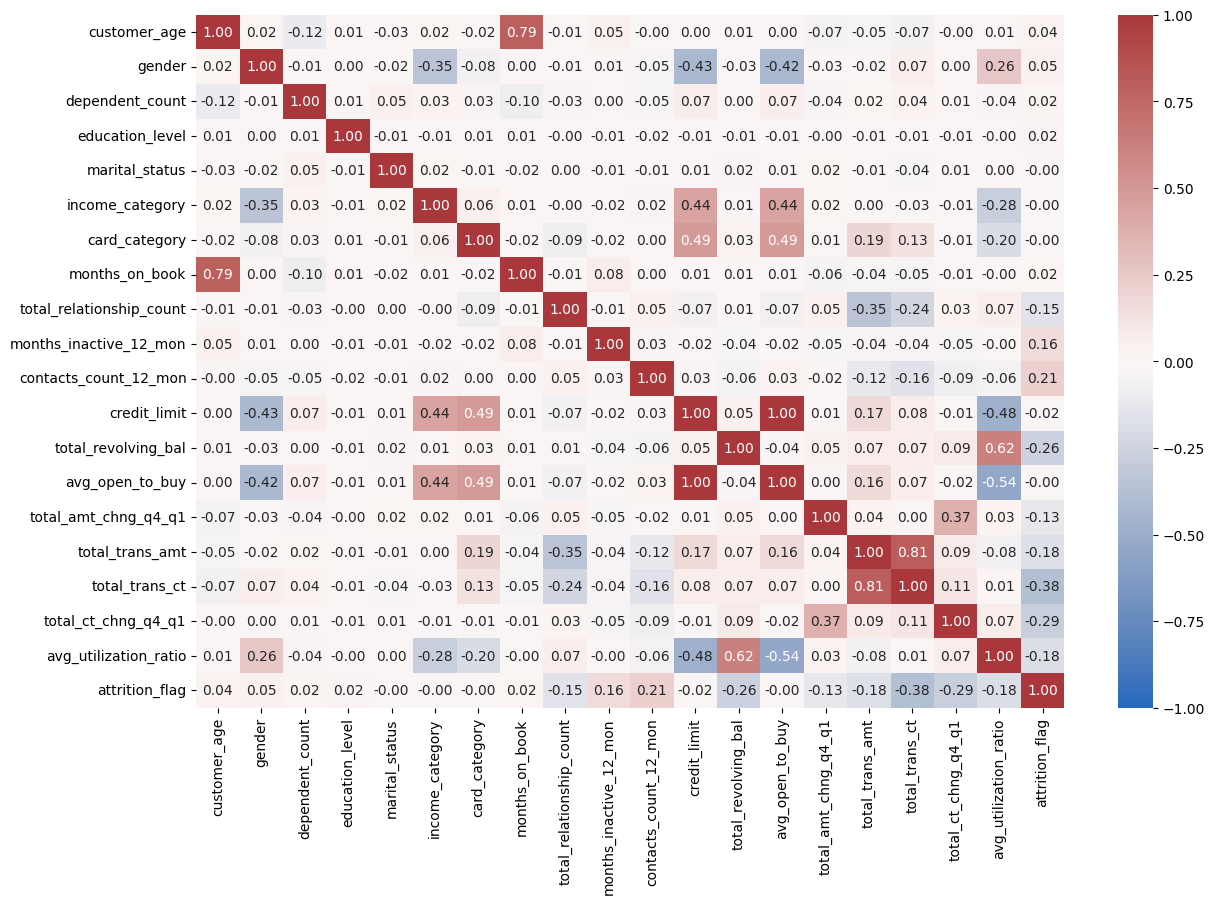

In [241]:
# melihat korelasi antar fitur dengan heatmap correlation

churn_train = pd.concat([ftr_train, tg_train], axis=1)
churn_corr = churn_train.corr()

plt.figure(figsize=(14,9))
sns.heatmap(churn_corr, annot=True, fmt = '.2f', cmap = 'vlag', vmin= -1, vmax = 1)
plt.show()

Interpretasi Hasil :<br>
Terdapat 6 variabel yang saling berkorelasi positif dan kuat, yaitu :<br>
customer age dengan months on book sebesar 0.79<br>
credit limit dengan avg open to buy sebesar 1 dan <br>
total trans amt dengan total trans ct sebesar 0.81 <br>

saya memilih untuk tidak menangani kolom customer age dan months on book karena ada dalam soal analisis<br>
untuk menghindari kesalahan hasil reason saya memilih menghapus kolom yang berkorelasi tinggi.<br>
untuk kolom credit limit, avg open to buy, total trans amt, total trans ct saya memilih mempertahankan salah satu kolom yang paling besar korelasinya terhadap target yaitu kolom credit limit dan total trans ct dan juga total trans ct ada dalam soal analisis.<br>


In [242]:
# menghapus kolom berkorelasi tinggi (redundant) di seluruh dataset
ftr_train = ftr_train.drop(columns=['avg_open_to_buy', 'total_trans_amt'])
ftr_test = ftr_test.drop(columns=['avg_open_to_buy', 'total_trans_amt'])

In [243]:
# mengecek kolom yang tersisa
ftr_train.columns, ftr_test.columns

(Index(['customer_age', 'gender', 'dependent_count', 'education_level',
        'marital_status', 'income_category', 'card_category', 'months_on_book',
        'total_relationship_count', 'months_inactive_12_mon',
        'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
        'total_amt_chng_q4_q1', 'total_trans_ct', 'total_ct_chng_q4_q1',
        'avg_utilization_ratio'],
       dtype='object'),
 Index(['customer_age', 'gender', 'dependent_count', 'education_level',
        'marital_status', 'income_category', 'card_category', 'months_on_book',
        'total_relationship_count', 'months_inactive_12_mon',
        'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
        'total_amt_chng_q4_q1', 'total_trans_ct', 'total_ct_chng_q4_q1',
        'avg_utilization_ratio'],
       dtype='object'))

### Simple EDA

<Axes: xlabel='attrition_flag'>

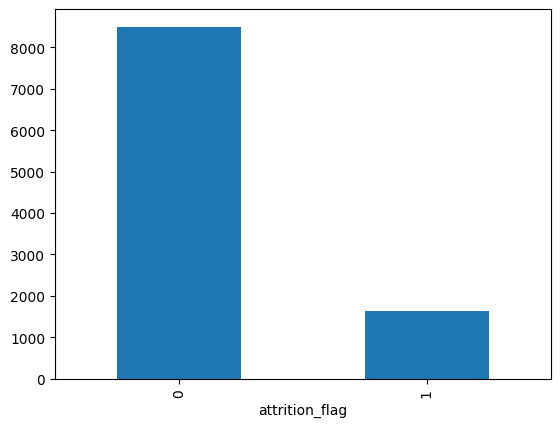

In [244]:
# display barchart customer status
churn_df['attrition_flag'].value_counts().plot(kind = 'bar')

Interpretasi : Imbalance data target value

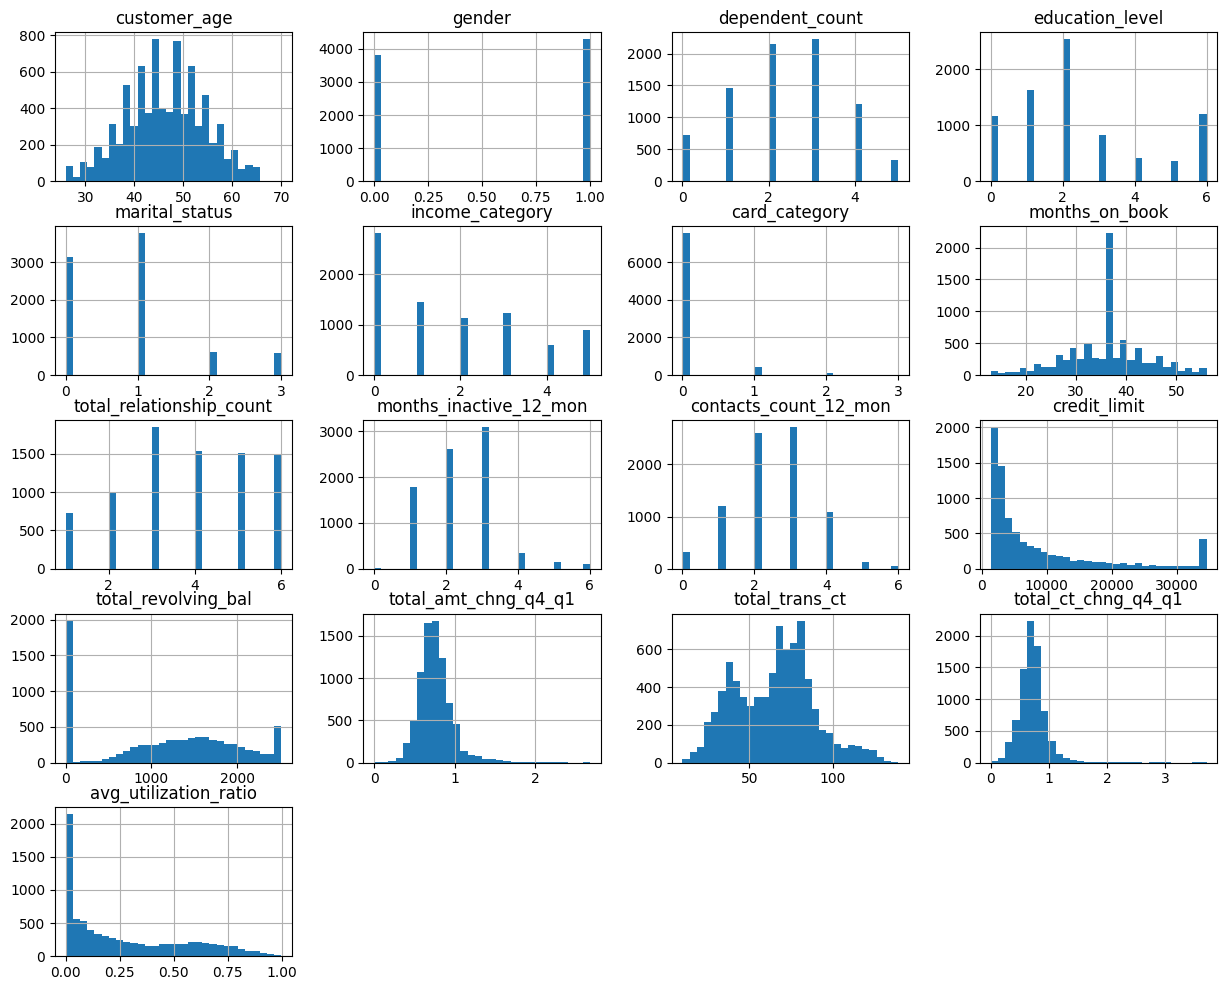

In [245]:
# check data distribution
ftr_train.hist(bins=30, figsize = (15, 12));

Interpretasi : persebaran data bervariasi, dan banyak kolom yang memilki nilai outliers

In [246]:
# Melihat jumlah kolom dan baris pada data feature train
ftr_train.shape

(8101, 17)

In [247]:
# Melihat jumlah baris pada data target train
tg_train.shape

(8101,)

In [248]:
# melihat proporsi target variabel
tg_train.value_counts()

,count
attrition_flag,
0,6801
1,1300


In [249]:
# melihat statistical summary
ftr_train.describe()

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000
mean,46.306382,0.528206,2.334773,2.438711,0.830268,1.753487,0.082336,35.923590,3.813233,2.346871,2.450315,8636.548068,1160.382792,0.760809,64.907789,0.712176,0.273187
std,8.022527,0.499235,1.289564,1.913655,0.848937,1.714092,0.331119,8.024359,1.551838,1.014177,1.100687,9086.419557,815.504293,0.216668,23.556379,0.239321,0.274595
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,41.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,326.000000,0.632000,45.000000,0.583000,0.022000
50%,46.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1273.000000,0.738000,67.000000,0.702000,0.174000
75%,52.000000,1.000000,3.000000,3.000000,1.000000,3.000000,0.000000,40.000000,5.000000,3.000000,3.000000,11128.000000,1782.000000,0.859000,81.000000,0.818000,0.497000
max,70.000000,1.000000,5.000000,6.000000,3.000000,5.000000,3.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,2.675000,139.000000,3.714000,0.999000


In [250]:
# menyiapkan kolom-kolom yang akan divisualisasi menggunakan subplot
var_name = ftr_train.select_dtypes(exclude ='object').columns
var_name

Index(['customer_age', 'gender', 'dependent_count', 'education_level',
       'marital_status', 'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'total_amt_chng_q4_q1', 'total_trans_ct', 'total_ct_chng_q4_q1',
       'avg_utilization_ratio'],
      dtype='object')

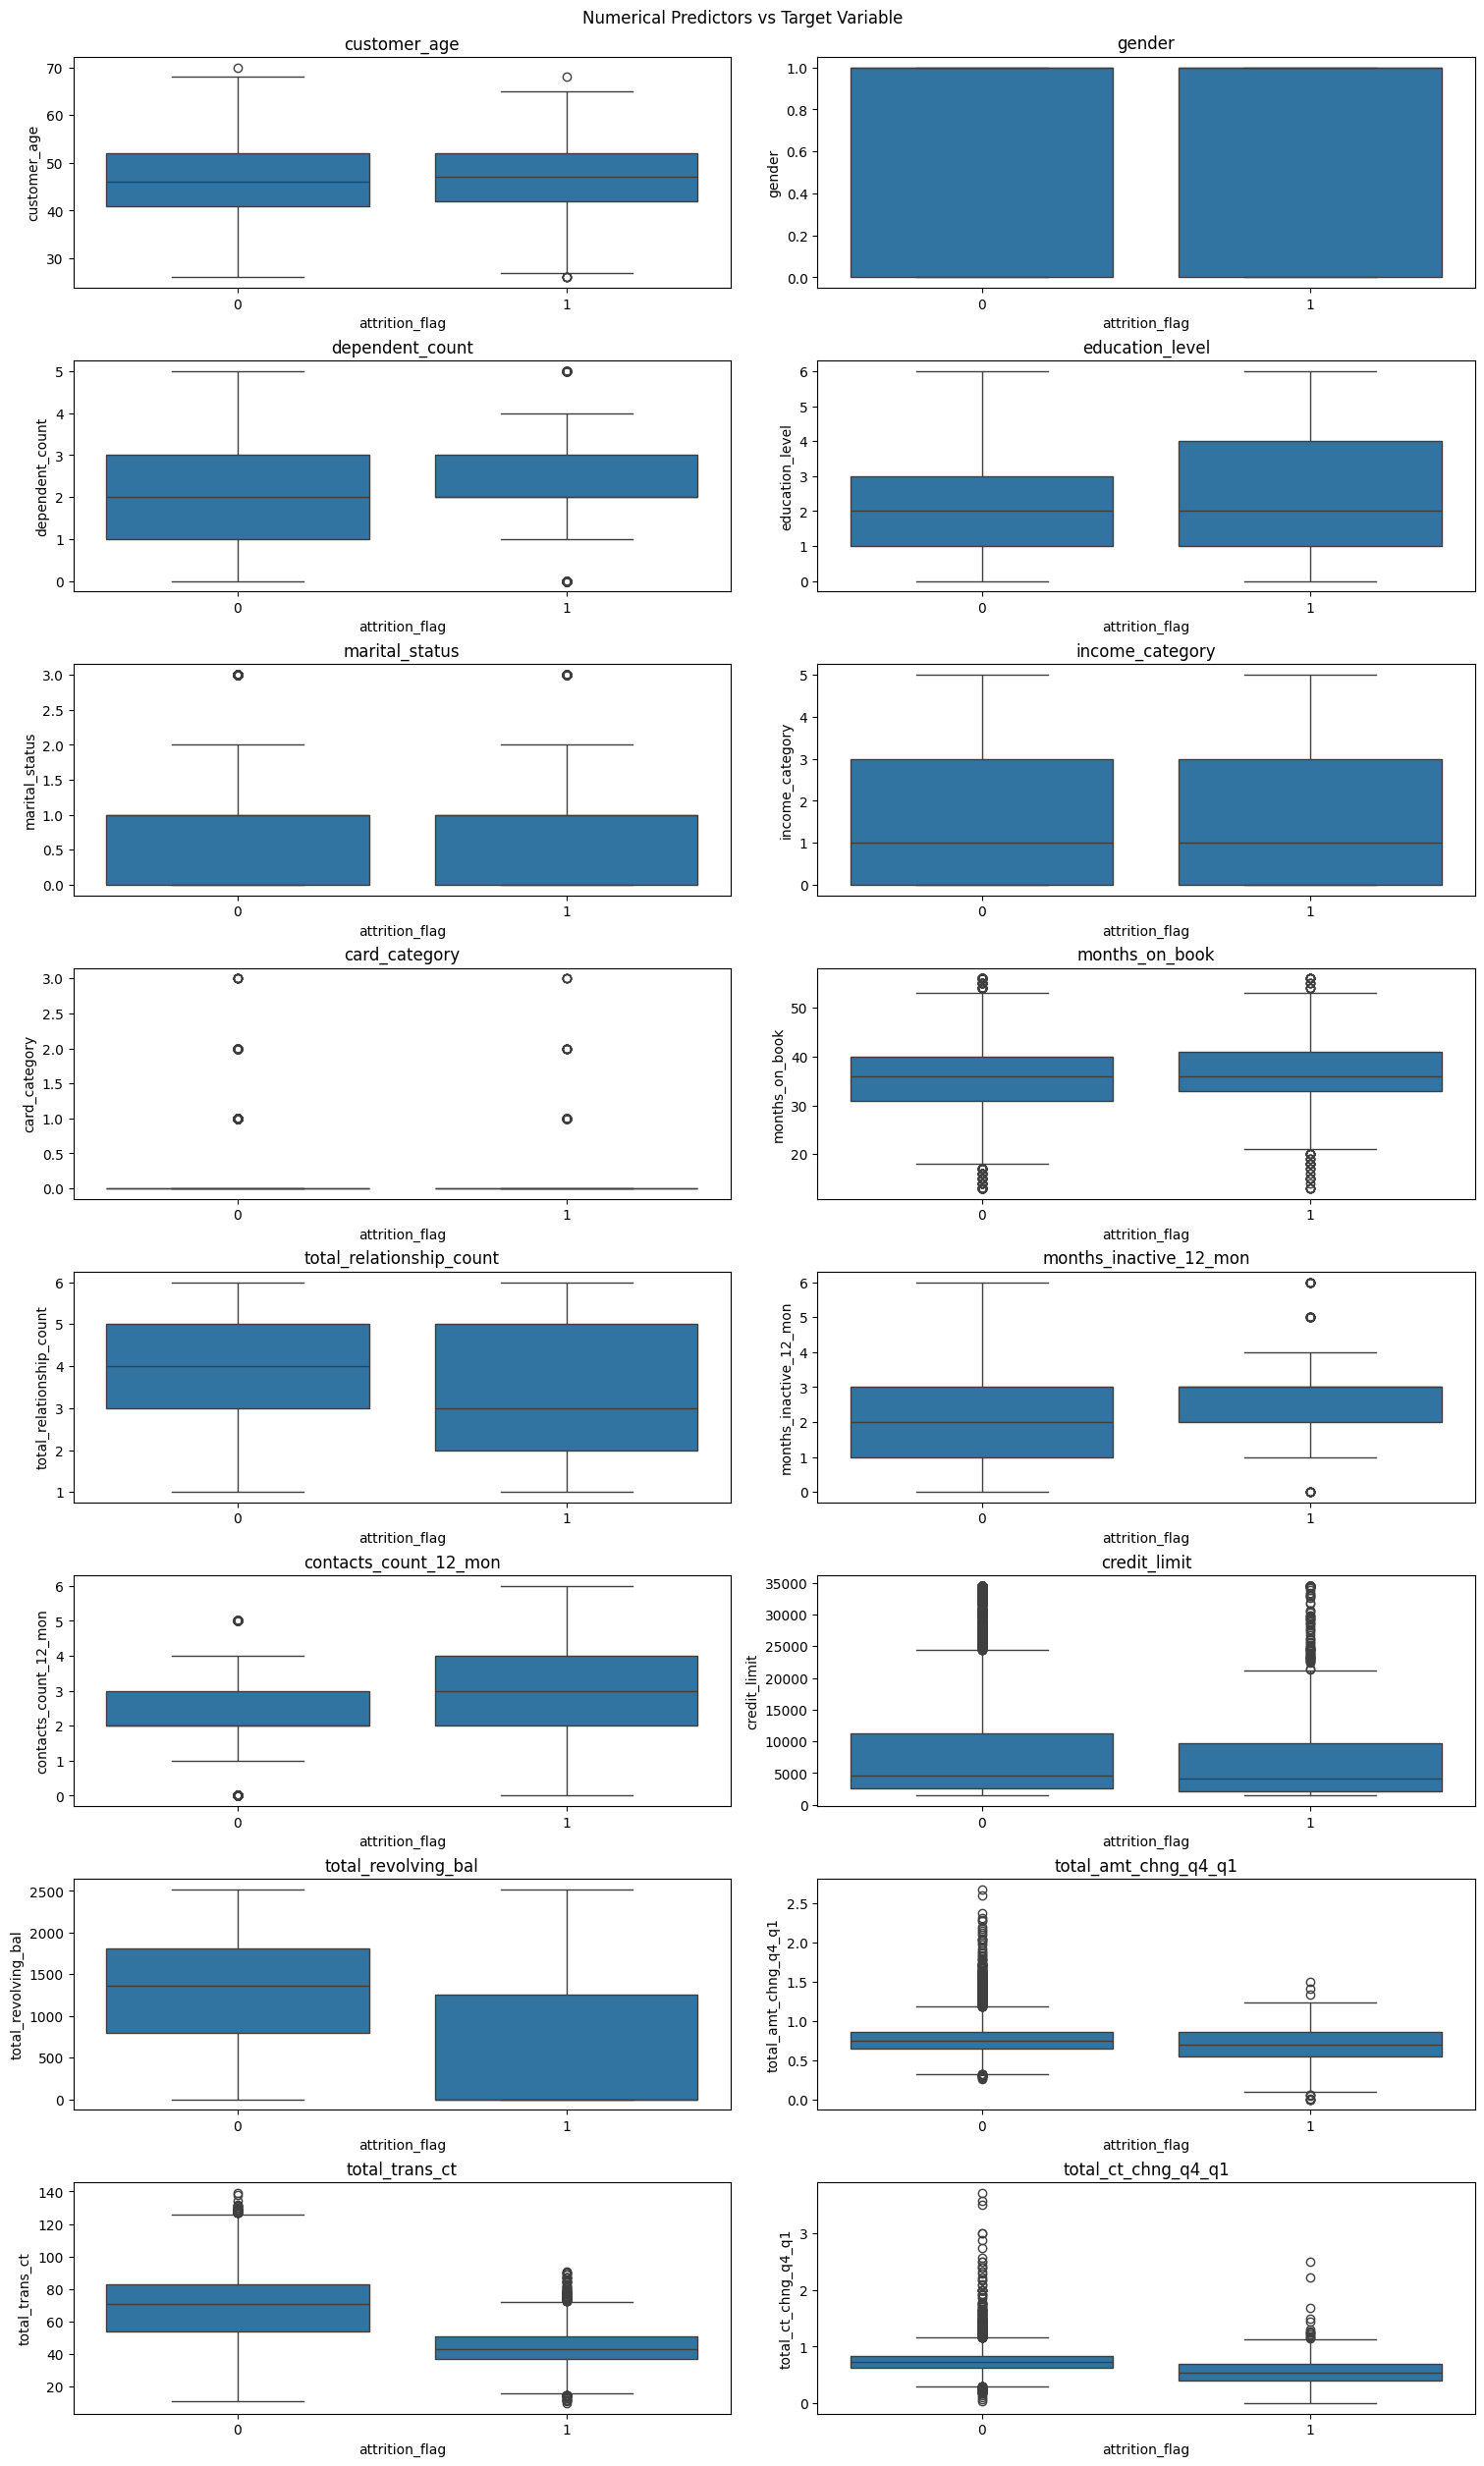

In [251]:
# membuat visualisasi predictor terhadap target variabel
fig, axes = plt.subplots(8,2, sharex=False, sharey = False, figsize=(15,25), constrained_layout = True)

fig.suptitle('Numerical Predictors vs Target Variable')

col_index = 0

for row in range(8):
  for col in range(2):
    sns.boxplot(ax = axes[row,col], x=tg_train, y = ftr_train[var_name[col_index]])
    axes[row,col].set_title(var_name[col_index])
    # axes[row,col].xticks(color='w')
    col_index += 1

Interpretasi: <br>
hasil boxplot menunjukkan hampir semua kolom memiliki nilai median yang mirip-mirip artinya memiliki feature importance yang rendah, kecuali kolom total relationship count, total revolving bal, total_ct_chng_q4_q1 dan total trans ct, memiliki nilai median yang cukup berbeda sehingga kemungkinan memiliki feature importance yang cukup tinggi.

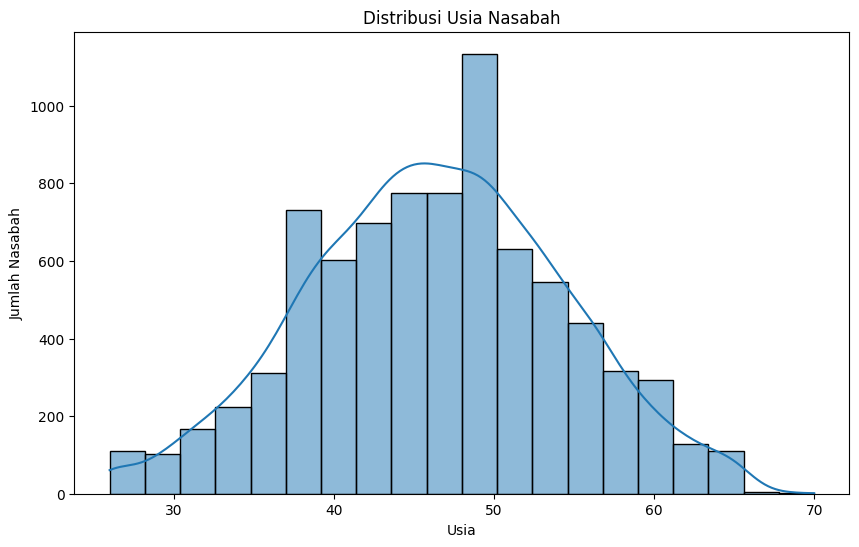

In [252]:
# Histogram distribusi usia
plt.figure(figsize=(10, 6))
sns.histplot(ftr_train['customer_age'], bins=20, kde=True)
plt.xlabel('Usia')
plt.ylabel('Jumlah Nasabah')
plt.title('Distribusi Usia Nasabah')
plt.show()


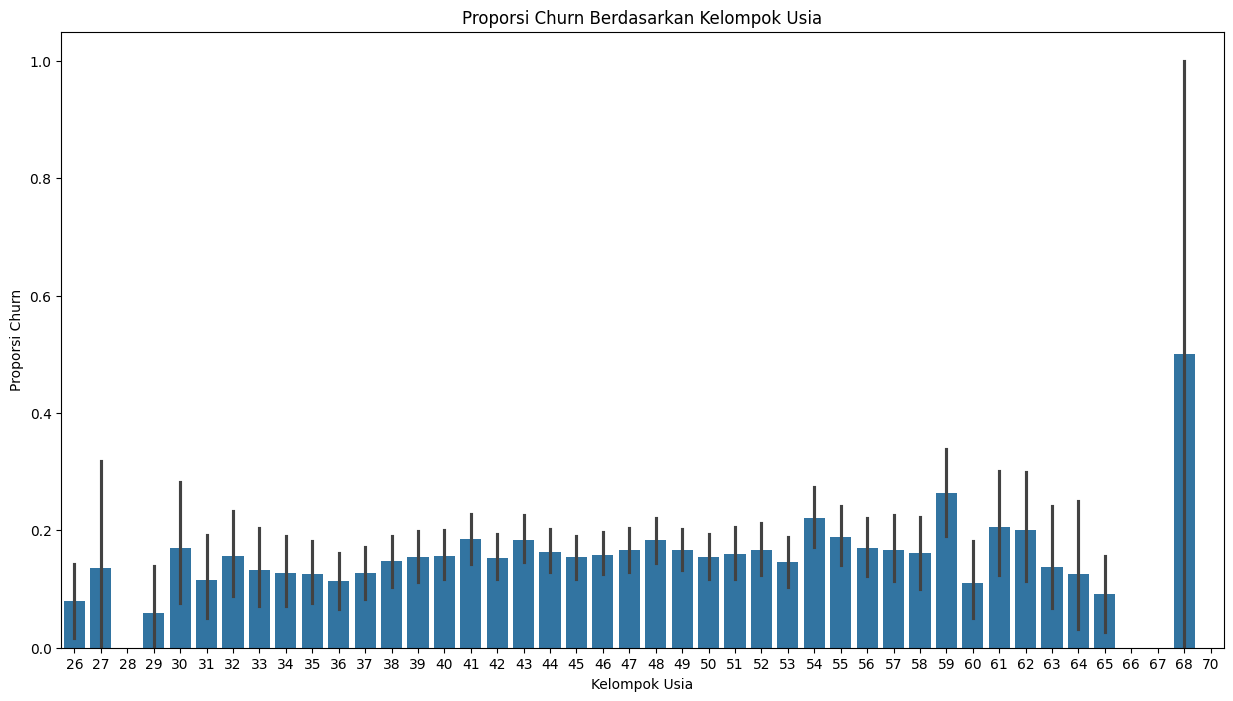

In [253]:
# membuat barplot customer age
plt.figure(figsize=(15, 8))
sns.barplot(x='customer_age', y=tg_train, data=ftr_train)
plt.title('Proporsi Churn Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Proporsi Churn')
plt.show()

## SOAL 1

SOAL A<br>
Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?<br>
Jawaban : bentuk distribusi usia nasabah adalah normal,
terlihat pada boxplot diatas median usia pelanggan di kedua kelompok (churn dan tidak churn) hampir sama, yang berarti usia mungkin tidak terlalu mempengaruhi apakah pelanggan churn atau tidak secara signifikan.<br>

Nasabah usia muda (sekitar 26-30 tahun) memiliki proporsi churn yang sangat tinggi, dengan beberapa kelompok usia memiliki proporsi mendekati 1 (100% churn). Ini menunjukkan bahwa pelanggan yang berusia muda memiliki kemungkinan churn yang lebih besar dibandingkan kelompok usia lainnya.
Nasabah di atas usia 65 tahun juga cenderung memiliki kemungkinan churn yang tinggi. Proporsi churn meningkat kembali secara signifikan pada usia 65 ke atas, mendekati 1 untuk usia 67 hingga 70.

In [254]:
#korelasi antara tingkat pendidikan dan income
correlation = churn_df[['education_level', 'income_category']].corr()
print(correlation)

                 education_level  income_category
education_level          1.00000         -0.01565
income_category         -0.01565          1.00000


SOAL B<br>
Apakah terdapat korelasi antara tingkat pendidikan dan income category? Bagaimana korelasi dari kedua prediktor tersebut terhadap churn?<br>

Jawaban:<br>
hasil correlation heatmap tidak menunjukkan adanya korelasi antara tingkat pendidikan (education level) dengan income category (0.01)<br>
dan juga tidak ada korelasi dari kedua prediktor tersebut terhadap churn.

SOAL C <br>
Apakah terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn?<br>

Jawaban :<br>
tidak terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn, terlihat dari boxplot.<br>

In [255]:
#korelasi antara durasi langgangan nasabah dengan target variabel
correlation = churn_df[['months_on_book', 'attrition_flag']].corr()
print(correlation)

                months_on_book  attrition_flag
months_on_book        1.000000        0.013687
attrition_flag        0.013687        1.000000


SOAL D<br>
Apakah semakin lama customer menjadi nasabah maka semakin kecil kemungkinan nasabah tersebut untuk churn?<br>

Jawaban:<br>
Berdasarkan boxplot, lama menjadi nasabah (months_on_book) tidak terlihat memiliki hubungan yang jelas dengan churn. Median lama menjadi nasabah untuk pelanggan yang churn dan tidak churn hampir sama. Jika ada pengaruh, itu sangat kecil, karena distribusi antara keduanya hampir identik. Artinya, dari data ini, lamanya waktu nasabah menjadi pelanggan tidak secara signifikan memengaruhi kemungkinan churn.<br>

Berdasarkan Heatmap Correlation pun sama, tidak memiliki korelasi yang kuat. sehingga lama atau tidaknya customer menjadi nasabah tidak mempengaruhi kemungkinan churn.

SOAL E<br>
Apakah semakin sering customer berinteraksi dengan bank dalam 1 tahun terakhir mempengaruhi besar atau kecilnya kemungkinan nasabah untuk churn?<br>

Jawaban:
hasil correlation heatmap menunjukkan adanya korelasi antara customer berinteraksi dengan bank dalam 1 tahun terakhir dengan kemungkinan nasabah untuk churn yaitu sebesar 0.38 tidak terlalu kuat namun korelasi positif.<br>
pada boxplot juga terlihat median yang cukup berbeda sehingga kemungkinan feature importancenya tinggi<br>
sehingga dapat disimpulkan bahwa semakin sering customer berinteraksi dengan bank dalam 1 tahun terakhir mempengaruhi kemungkinan nasabah untuk churn<br>



## SOAL 2

##Modeling

### Random Forest

In [256]:
# define random forest model
random_forest_clf = RandomForestClassifier(
    random_state = 1000,
    n_estimators=100
)
# fit model to training data
random_forest_clf.fit(ftr_train, tg_train)

RandomForestClassifier(random_state=1000)

### XGBoost

In [257]:
# define XG Boost model
xgb_clf = XGBClassifier(
    random_state = 1000
)
# fit model to training data
xgb_clf.fit(ftr_train, tg_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1000, ...)

###Model Evaluation

In [258]:
# random forest prediction
rf_pred = random_forest_clf.predict(ftr_test)
rf_pred_proba = random_forest_clf.predict_proba(ftr_test)

# random forest prediction result
pd.DataFrame(metrics.classification_report(tg_test, rf_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.935087,0.882845,0.928924,0.908966,0.926655
recall,0.983520,0.645260,0.928924,0.814390,0.928924
f1-score,0.958692,0.745583,0.928924,0.852137,0.924296
support,1699.000000,327.000000,0.928924,2026.000000,2026.000000


Interpretasi:<br>
model random forest memiliki akurasi 93% tapi karena datanya imbalance dan datanya beresiko tinggi terhadap kesalahan prediski jadi saya memilih recall yaitu sebesar 64%

In [259]:
# XGBoost prediction
xgb_pred = xgb_clf.predict(ftr_test)
xgb_pred_proba = xgb_clf.predict_proba(ftr_test)

# XGBoost prediction result
pd.DataFrame(metrics.classification_report(tg_test, xgb_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.945392,0.861940,0.934353,0.903666,0.931923
recall,0.978222,0.706422,0.934353,0.842322,0.934353
f1-score,0.961527,0.776471,0.934353,0.868999,0.931659
support,1699.000000,327.000000,0.934353,2026.000000,2026.000000


Interpretasi: <br>
model XG Boost memiliki akurasi 93% tapi karena datanya imbalance dan datanya beresiko tinggi terhadap kesalahan prediski jadi saya memilih recall yaitu sebesar 70%, nilai ini lebih besar dari hasil prediksi random forest jadi saya menyimpulkan model ini yang terbaik.

## SOAL 3

###Confusion Matrix XG Boost

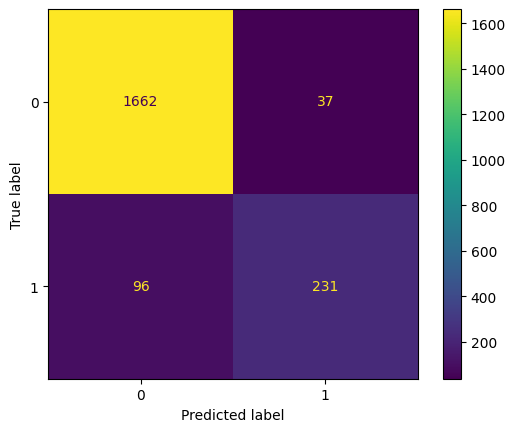

In [270]:
# membuat confusion matrix
cm = confusion_matrix(tg_test, xgb_pred)

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Interpretasi : <br>
dari 327 customer yang churn, 231 orang diprediksi benar (TP) dan 96 salah prediksi (FN)

Model yang saya buat akan lebih baik dalam mengidentifikasi customer yang akan churn dibandingkan tanpa menggunakan model. saya menggunakan recall dan confusion matrix dengan hasil yang baik sesuai dengan interpretasi-interpretasi diatas.

## SOAL 4

### Model Agnostik Method

In [264]:
# initiate explainer for Random Forest model
churn_rf_exp = dx.Explainer(random_forest_clf, ftr_train, tg_train, label = "RF Interpretation")

# initiate explainer for XGBoost model
churn_xgb_exp = dx.Explainer(xgb_clf, ftr_train, tg_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 8101 rows 17 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8101 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF Interpretation
  -> predict function  : <function yhat_proba_default at 0x7911449fba30> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.161, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.42, mean = -0.000676, max = 0.45
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 8101 rows 17 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a 

### Permutation Feature Importance and Partial Dependence Plot

In [276]:
# visualizr permutation feature importance for Random Forest Model
plt.figure(figsize=(12, 8))
churn_rf_exp.model_parts().plot()

<Figure size 1200x800 with 0 Axes>

Interpretasi : <br>
ada 4 feature yang berdampak terhadap prediksi model :<br>
1. total trans ct (banyaknya transaksi dalam 12 bulan terakhir) memiliki dampak paling kuat dalam random forest model<br>
2. lalu setelahnya total revolving bal (total dana yang digunakan dalam satu periode)<br>
3. lalu total relationship count (jumlah produk yang digunakan oleh nasabah di bank)<br>
4. dan total_ct_chng_q4_q1 (jumlah transaksi pelanggan meningkat antara kuartal 4 dan kuartal 1)<br>
selebihnya tidak terlalu berdampak bahkan tidak berdampak<br>
hasil ini sama seperti yang tergambar oleh boxplot yaitu keempat feature yang berdampak ini memiliki nilai median yang berbeda (tidak redundant).

In [277]:
# visualizr permutation feature importance for XGBoost Model
plt.figure(figsize=(12, 8))
churn_xgb_exp.model_parts().plot()

<Figure size 1200x800 with 0 Axes>

Interpretasi: <br>
ada 6 feature yang berdampak terhadap prediksi model :<br>
1. total trans ct  (banyaknya transaksi dalam 12 bulan terakhir) memiliki dampak paling kuat dalam XGBoost model sama seperti hasil random forest<br>
2. lalu total relationship count (jumlah produk yang digunakan oleh nasabah di bank)<br>
3. lalu setelahnya total revolving bal (total dana yang digunakan dalam satu periode), ini berbeda dengan random forest, dalam model random forest feature kedua dan ketiga (dibalik)<br>
4. kemudian total_ct_chng_q4_q1 (jumlah transaksi pelanggan meningkat antara kuartal 4 dan kuartal 1)<br>
dan ada tambahan 2 feature yang berbeda dari hasil random forest, disini hasilnya berdampak lebih kuat walaupun hanya naik sedikit<br>
5. total_amt_chng_q4_q1 (peningkatan nominal transaksi pelanggan antara kuartal 4 dan kuartal 1)<br>
6. credit_limit (batas nominal transaksi kartu kredit dalam satu periode)
selebihnya tidak terlalu berdampak bahkan tidak berdampak<br>



In [267]:
# create partial dependence plot of Random Forest model
churn_rf_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 17/17 [00:04<00:00,  3.66it/s]


Explanation Partial Dependence Plot Model Random Forest : <br>
1. customer age : makin bertambah umur makin naik kemungkinan untuk churn, ini masuk akal karena saat sudah tua akan pensiun dan tidak memiliki penghasilan rutin tiap bulan lagi maka kalau kredit tidak bisa bayar, dan juga rata-rata umur manusia sampai 65 tahun. lebih dari itu lebih sedikit jumlahnya<br>
2. gender : naik probabilitas churn nya, tapi kecil pengaruhnya<br>
3. dependent count : naik probabilitas churn nya, tapi kecil pengaruhnya<br>
4. education level : turun sedikit lalu naik probabilitas churnnya, dan kecil pengaruhnya<br>
5. marital status : naik probabilitas churn nya, tapi kecil pengaruhnya<br>
6. income category : turun sedikit lalu naik probabilitas churnnya, tapi kecil pengaruhnya<br>
7. card category : menaik probabilitas churn nya, tapi kecil pengaruhnya<br>
8. months on book : lamanya menjadi customer menurunkan probabilitas churn, tapi kecil pengaruhnya<br>
9. total relationship count : semakin banyak produk yang digunakan, probabilitas churnn ya menurun, mungkin karena kecocokan nasabah kepada bank<br>
10. months inactive 12 mon : turun lalu naik sedikit, semakin tidak aktif dalam 12 bulan semakin turun probabilitas churn nya, ini kurang masuk akal<br>
11. contacs count 12 mon : semakin tinggi interaksi nasabah dengan bank, probabilitas churn nya malah semakin tinggi, ini kurang masuk akal<br>
12. credit limit : semakin tinggi credit limit semakin tinggi probabilitas churn<br>
13. total revolving bal : naik turun lalu naik lagi, semakin banyak dana yang digunakan semakin naik probabilitas churn nya<br>
14. total_amt_chng_q4_q1 : semakin naik nominal transaksi nasabah antara quarter 4 dan quarter 1, semakin turun probabilitas churn nya<br>
15. total_trans_ct : semakin banyak transaksi nasabah, kemungkinan churn turun drastis<br>
16. total_ct_chng_q4_q1 : semakin naik transaksi nasabah antara quarter 4 dan 1, kemungkinan churn turun lalu stagnan<br>
17. avg_utilization_ratio : semakin banyak presentase kartu kredit yang digunakan, kemungkinan untuk churn menjadi naik<br>


In [268]:
# create partial dependence plot of XGBoost model
churn_xgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 17/17 [00:01<00:00, 11.76it/s]


Explanation Partial Dependence Plot Model XGBoost : <br>
1. customer age : makin bertambah umur makin naik kemungkinan untuk churn, tapi kemudian turun sedikit kemungkinan untuk churn<br>
2. gender : stagnan probabilitas churn nya<br>
3. dependent count : naik probabilitas churn nya, tapi kecil pengaruhnya<br>
4. education level : naik probabilitas churnnya, dan kecil pengaruhnya<br>
5. marital status : turun probabilitas churnnya, dan kecil pengaruhnya<br>
6. income category : stagnan probabilitas churn nya<br>
7. card category : naik probabilitas churn nya, tapi kecil pengaruhnya<br>
8. months on book : lamanya menjadi customer menurunkan probabilitas churn, tapi kecil pengaruhnya<br>
9. total relationship count : semakin banyak produk yang digunakan, probabilitas churnn ya menurun, mungkin karena kecocokan nasabah kepada bank<br>
10. months inactive 12 mon : semakin tidak aktif dalam 12 bulan semakin turun probabilitas churn nya, ini kurang masuk akal<br>
11. contacts count 12 mon : semakin tinggi interaksi nasabah dengan bank, probabilitas churn nya malah semakin tinggi, ini kurang masuk akal<br>
12. credit limit : semakin tinggi credit limit semakin tinggi probabilitas churn tapi sedikit pengaruhnya.
13. total revolving bal : naik turun lalu naik lagi, semakin banyak dana yang digunakan semakin naik probabilitas churn nya<br>
14. total amt chng_q4_q1 : turun lalu stagnan
15. total trans ct : semakin banyak transaksi nasabah, kemungkinan churn turun drastis<br>
16. total ct chng q4 q1 : semakin naik transaksi nasabah antara quarter 4 dan 1, kemungkinan churn turun lalu stagnan<br>
17. avg_utilization_ratio : semakin banyak presentase kartu kredit yang digunakan, kemungkinan untuk churn menjadi naik<br>

Tidak ada perbedaan yang signifikan antara hasil partial dependence plot model random forest dengan XGBoost



### Kesimpulan: <br>
model terprediksi dengan baik dengan reason yang sesuai dan dapat diterima <br>

rekomendasi : karena total transaksi yang dilakukan customer dalam 12 bulan terakhir memiliki dampak yang besar bagi probabilitas churn, saya merekomendasikan tim marketing untuk buat customer sering bertransaksi misal jika pake credit card barang yg dibeli jadi diskon